# Análise de Gastos de Operadoras de Plano de Saúde

---



Os diretores perceberam que os gastos de
seguro saúde aumentaram de forma considerável e precisam monitorar a
evolução dos gastos.
Os diretores precisam de respostas às seguintes perguntas:
1. Qual o gasto total da operadora?
2. Qual a idade média dos usuários da operadora?
3. Qual o gasto médio por região?
4. Qual faixa etária possui maior gasto com seguro saúde por região?
5. Crianças tem gasto maior que adultos?
6. Qual a proporção de crianças por região?
7. O aumento da idade influencia no imc?
8. Quem tem maior gasto, homens ou mulheres?
9. Se o usuário for mulher, o imc é acima ou abaixo da média?
10. Se for homem, com mais de 50 anos e da região Sudeste, o gasto é
maior ou menor que a média de gastos da região?


---



In [8]:
import pandas as pd
import numpy as np

import seaborn           as sns
import matplotlib.pyplot as plt


from google.colab import files
from google.colab import drive



In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv('/content/drive/MyDrive/seguro_saude.csv')

#Conhecendo a Base

In [15]:
df.head()

,idade,sexo,imc,crianca,fumante,regiao,valor_seguro_saude
0,idade,sexo,imc,crianca,fumante,regiao,valor_seguro_saude
1,35,masculino,27.74,2,sim,norte,20984.0936
2,63,feminino,31.8,0,nao,sudeste,13880.949
3,40,masculino,41.23,1,nao,norte,6610.1097
4,20,masculino,33,1,nao,sudeste,1980.07


In [16]:
df.describe()

,idade,sexo,imc,crianca,fumante,regiao,valor_seguro_saude
count,1339,1337,1339,1339,1338,1338,1339
unique,48,4,549,7,3,6,1338
top,18,masculino,32.3,0,nao,sul,1639.5631
freq,69,675,13,574,1063,363,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   idade               1339 non-null   object
 1   sexo                1337 non-null   object
 2   imc                 1339 non-null   object
 3   crianca             1339 non-null   object
 4   fumante             1338 non-null   object
 5   regiao              1338 non-null   object
 6   valor_seguro_saude  1339 non-null   object
dtypes: object(7)
memory usage: 73.4+ KB


In [18]:
df.isnull().sum()

idade                 0
sexo                  2
imc                   0
crianca               0
fumante               1
regiao                1
valor_seguro_saude    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   idade               1339 non-null   object
 1   sexo                1337 non-null   object
 2   imc                 1339 non-null   object
 3   crianca             1339 non-null   object
 4   fumante             1338 non-null   object
 5   regiao              1338 non-null   object
 6   valor_seguro_saude  1339 non-null   object
dtypes: object(7)
memory usage: 73.4+ KB


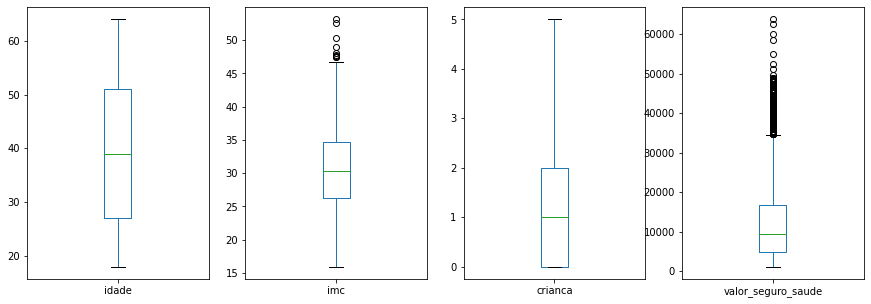

In [35]:
df.plot(kind = "box", subplots=True, figsize=(15,5))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12505380d0>,
      dtype=object)

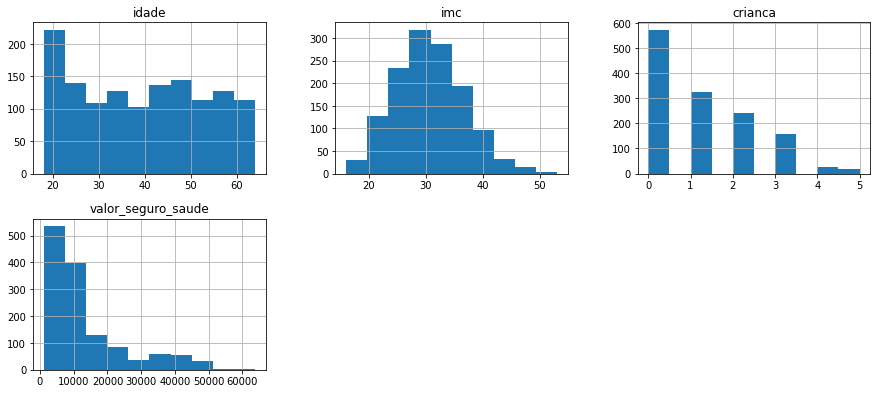

In [36]:
df.hist(layout=(3,3), figsize=(15,10))

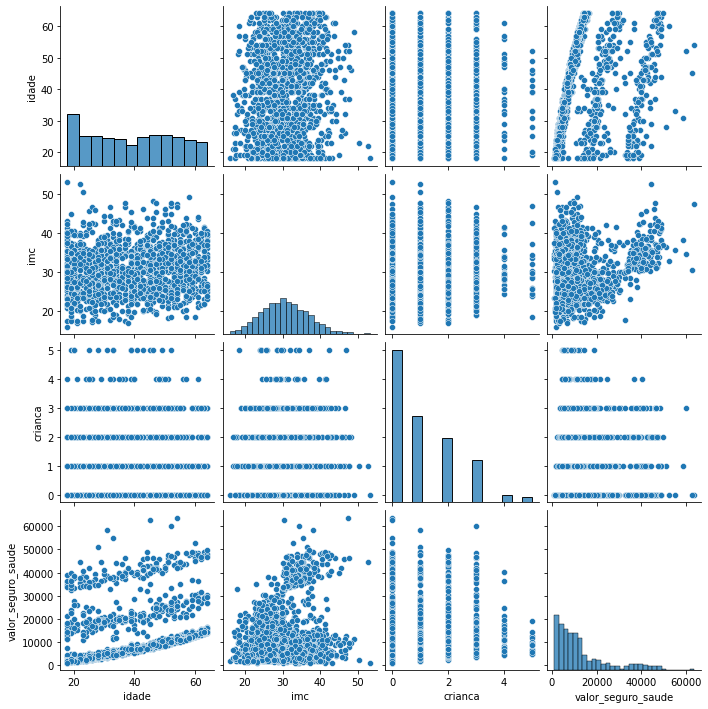

In [37]:
sns.pairplot(df)

#Funções

In [21]:
#Função para arredondar valores em 2 casas decimais

def arred(x):
  return round(x,2)
  
#Função para mostrar valores unicos 

def vlr_unique(col_u):
  return col_u.unique()

#Função para mostrar quantidade valores unicos 

def vlr_counts(col_v):
  return col_v.value_counts()


#Realizando a tratativa nos dados

---












In [22]:
# Removendo a 1ª linha, pois é duplicada do cabeçalho
df.drop(0 , inplace=True)

In [23]:
# Formantando os tipos corretos das colunas
df['idade'] = df['idade'].astype('int64')
df['imc'] = df['imc'].astype('float64')
df['crianca'] = df['crianca'].astype('float64')
df['valor_seguro_saude'] = df['valor_seguro_saude'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idade               1338 non-null   int64  
 1   sexo                1336 non-null   object 
 2   imc                 1338 non-null   float64
 3   crianca             1338 non-null   float64
 4   fumante             1337 non-null   object 
 5   regiao              1337 non-null   object 
 6   valor_seguro_saude  1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


In [24]:
vlr_unique(df['sexo'])

array(['masculino', 'feminino', nan, '2'], dtype=object)

In [25]:
vlr_counts(df['sexo'])

masculino    675
feminino     660
2              1
Name: sexo, dtype: int64

In [26]:
df['sexo'] = df['sexo'].fillna("masculino")
df.loc[df['sexo'] =='2','sexo'] = "feminino"

Optei por classificar:
 > Vazio: masculino

 > 2: feminino.


In [27]:
vlr_unique(df['fumante'])

array(['sim', 'nao', nan], dtype=object)

In [28]:
vlr_counts(df['fumante'])

nao    1063
sim     274
Name: fumante, dtype: int64

In [29]:
df['fumante'] = df['fumante'].fillna('nao')

Optei por classificar:
 > Vazio: não

In [30]:
vlr_unique(df['regiao'])

array(['norte', 'sudeste', 'nordeste', 'sul', nan, '1'], dtype=object)

In [31]:
vlr_counts(df['regiao'])

sul         363
nordeste    325
sudeste     324
norte       324
1             1
Name: regiao, dtype: int64

In [32]:
df['regiao'].unique()

array(['norte', 'sudeste', 'nordeste', 'sul', nan, '1'], dtype=object)

In [33]:
df['regiao'] = df['regiao'].fillna('norte')
df.loc[df['regiao'] =='1','regiao'] = "sul"

Optei por classificar:
 > Vazio: norte
 
 > 1: sul

In [34]:
df.isnull().sum()

idade                 0
sexo                  0
imc                   0
crianca               0
fumante               0
regiao                0
valor_seguro_saude    0
dtype: int64

#1. Qual o gasto total da operadora?

---



In [38]:
vlr = arred(df['valor_seguro_saude'].sum() )
print('Gasto total da operadora: {}'.format(vlr))

Gasto total da operadora: 17755824.99


#2. Qual a idade média dos usuários da operadora?

---



In [39]:
idade_media = arred(df['idade'].mean())
print('Idade média dos usuários: {}'.format(idade_media,))

Idade média dos usuários: 39.21


#3. Qual o gasto médio por região?

---



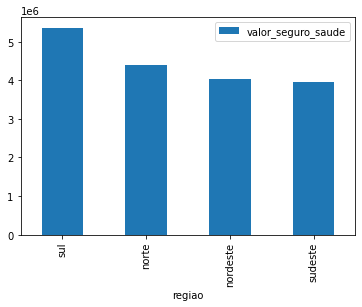

In [40]:
gasto_medio = arred(df[['regiao','valor_seguro_saude']].groupby('regiao').sum().reset_index())
gasto_medio.sort_values('valor_seguro_saude', ascending=False)[['regiao','valor_seguro_saude']].plot(kind="bar", x='regiao',y='valor_seguro_saude')

#4. Qual faixa etária possui maior gasto com seguro saúde por região?

---



In [41]:
# Criando classificação de idade 
df['faixa_etaria'] = 0

for i in df['idade']:
  df.loc[df['idade'] <= 18,'faixa_etaria'] = "0 - 18"
  df.loc[df['idade'] >= 19,'faixa_etaria'] = "19 - 29"
  df.loc[df['idade'] >= 30,'faixa_etaria'] = "30 - 39"
  df.loc[df['idade'] >= 40,'faixa_etaria'] = "40 - 49"
  df.loc[df['idade'] >= 50,'faixa_etaria'] = "50 - 59"
  df.loc[df['idade'] >= 60,'faixa_etaria'] = "Acima 60"


In [42]:
#Agrupando por região e faixa etária o valor total gasto
vlr_regiao = arred(df[['valor_seguro_saude','regiao','faixa_etaria']].groupby(['regiao','faixa_etaria']).sum().reset_index())
vlr_regiao

,regiao,faixa_etaria,valor_seguro_saude
0,nordeste,19 - 29,814127.82
1,nordeste,30 - 39,639746.98
2,nordeste,40 - 49,946385.81
3,nordeste,50 - 59,1085347.91
4,nordeste,Acima 60,550103.48
5,norte,0 - 18,241879.44
6,norte,19 - 29,683666.37
7,norte,30 - 39,780262.59
8,norte,40 - 49,947053.53
9,norte,50 - 59,1185820.30


In [43]:
#Identificando o valor mais alto por região e faixa etária
for regiao in vlr_regiao.regiao.unique():
  
  vlr_filtro = vlr_regiao[(vlr_regiao['regiao'] == regiao)]

  maximo = vlr_filtro['valor_seguro_saude'].max()

  for index,row in vlr_regiao.iterrows():
    item_regiao = row['regiao']
    item_valor = row['valor_seguro_saude']

    if ( regiao == item_regiao ) and (maximo == item_valor):
      item_faixa = row['faixa_etaria']
    else:
      pass

  print("--------------------------------")
  print("Região:" + regiao.upper() + "\nFaixa Etária: " + item_faixa + "\nValor Seguro Saúde: ", + maximo)
  print("--------------------------------")
  

--------------------------------
Região:NORDESTE
Faixa Etária: 50 - 59
Valor Seguro Saúde:  1085347.91
--------------------------------
--------------------------------
Região:NORTE
Faixa Etária: 50 - 59
Valor Seguro Saúde:  1185820.3
--------------------------------
--------------------------------
Região:SUDESTE
Faixa Etária: 19 - 29
Valor Seguro Saúde:  902776.24
--------------------------------
--------------------------------
Região:SUL
Faixa Etária: 50 - 59
Valor Seguro Saúde:  1332747.92
--------------------------------


#5. Crianças tem gasto maior que adultos?

---



In [44]:
gasto_crianca = arred(df[(df['faixa_etaria'] == '0 - 18')].sum().valor_seguro_saude)
gasto_adulto = arred(df[(df['faixa_etaria'] != '0 - 18')].sum().valor_seguro_saude)

if (gasto_crianca > gasto_adulto):
  dif = arred(gasto_crianca - gasto_adulto)
  print("O gasto das crianças em relação aos adultos, é maior em: {}" .format(dif))
  print("\n Gasto Criança: " + str(round(gasto_crianca,2)) + "\n Gasto Adulto: " + str(gasto_adulto))
else:
  dif = arred(gasto_adulto - gasto_crianca)
  print("O gasto das crianças em relação aos adultos, é menor em: {}" .format(dif))
  print("\n Gasto Criança: " + str((gasto_crianca)) + "\n Gasto Adulto: " + str(gasto_adulto))


O gasto das crianças em relação aos adultos, é menor em: 16777926.97

 Gasto Criança: 488949.01
 Gasto Adulto: 17266875.98


#6. Qual a proporção de crianças por região?

---



In [45]:
#total de crianças por região 
total_criancas = df[(df['faixa_etaria']=='0 - 18')]
total_criancas[['faixa_etaria','regiao']].groupby('regiao').count().reset_index()


,regiao,faixa_etaria
0,norte,32
1,sul,37


Não há crianças nas regiões nordeste e sudeste.

In [46]:
#total de pessoas por região
total_pessoas = df[['faixa_etaria','regiao']].groupby('regiao').count().reset_index()
total_pessoas

,regiao,faixa_etaria
0,nordeste,325
1,norte,325
2,sudeste,324
3,sul,364


In [47]:
#norte
qtd_norte = arred((32/325) *100)
print("Há {}% de crianças na região norte.".format(qtd_norte))

#sul
qtd_sul = arred((37/364) * 100)
print("Há {}% de crianças na região sul.".format(qtd_sul))

Há 9.85% de crianças na região norte.
Há 10.16% de crianças na região sul.


#7. O aumento da idade influencia no imc?

---



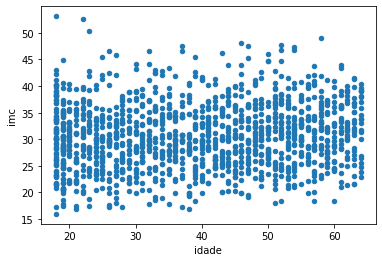

In [48]:
df.plot.scatter(x='idade',y='imc')

In [49]:
df.corr()

,idade,imc,crianca,valor_seguro_saude
idade,1.000000,0.109272,0.042469,0.299008
imc,0.109272,1.000000,0.012759,0.198341
crianca,0.042469,0.012759,1.000000,0.067998
valor_seguro_saude,0.299008,0.198341,0.067998,1.000000


Não há influência entre o aumento da idade para afetar o IMC.

#8. Quem tem maior gasto, homens ou mulheres?

---



In [50]:
masculino = df[(df['sexo']=='masculino')].sum().valor_seguro_saude
feminino = df[(df['sexo']=='feminino')].sum().valor_seguro_saude

if (masculino > feminino):
  dif = arred(masculino - feminino)
  print("O gasto do sexo masculino em relação ao feminino, é maior em: {}" .format((dif)))
  print("\n Gasto Homem: " + str((masculino)) + "\n Gasto Mulher: " + str((feminino)))
else:
  dif = feminino - masculino
  print("O gasto do sexo masculino em relação ao feminino, é menor em: {}" .format((dif)))
  print("\n Gasto Homem: " + str((masculino)) + "\n Gasto Mulher: " + str((feminino)))


O gasto do sexo masculino em relação ao feminino, é maior em: 1147616.13

 Gasto Homem: 9451720.55879
 Gasto Mulher: 8304104.431969


#9. Se o usuário for mulher, o IMC é acima ou abaixo da média?

---



In [51]:
#Foi fornecido a classificação do IMC:
###Abaixo da média <= 18.5
###Acima da média <= 24.9

df['classif_imc'] = " "
for i in df['imc']:
    df.loc[df['imc'] < 18.5,'classif_imc'] = "Abaixo da Média"
    df.loc[df['imc'] > 24.9,'classif_imc'] = "Acima da Média"
    df.loc[df['classif_imc'] == " ",'classif_imc'] = "Dentro da Média"




In [52]:
#Média IMC geral
imc_geral = arred(df.imc.mean())

#Média IMC usuário feminino

imc_feminino = arred(df[(df['sexo'] == 'feminino')].mean().imc)


if (imc_geral > imc_feminino):
  dif = arred(imc_geral - imc_feminino)
  print("O IMC feminino baseado na média geral, é menor em: {}" .format(dif))
  print("\n IMC Geral: " + str((imc_geral)) + "\n IMC Feminino: " + str(imc_feminino))
else:
  dif = arred(imc_feminino - imc_geral)
  print("O IMC feminino baseado na média geral, é maior em: {}" .format((dif)))
  print("\n IMC Geral: " + str((imc_geral)) + "\n IMC Feminino: " + str((imc_feminino)))


O IMC feminino baseado na média geral, é menor em: 0.29

 IMC Geral: 30.66
 IMC Feminino: 30.37


Se o usuário é mulher o imc é acima da média.
IMC mulher: 30.37
Média IMC: 30.66

#10. Se for homem, com mais de 50 anos e da região Sudeste, o gasto é maior ou menor que a média de gastos da região?

---



In [53]:
# Média de gastos na regiao sudeste
media_gasto_sudeste = arred(df[(df['regiao']=='sudeste')&(df['valor_seguro_saude'])].mean().valor_seguro_saude)

# Valor gasto, homem mais de 50 e região sudeste
valor_gasto = df[(df['regiao']=='sudeste') & (df['idade'] >= 50) & (df['sexo'] == 'masculino')]
media_gasto_sudeste_50 = arred(valor_gasto['valor_seguro_saude'].mean())

if (media_gasto_sudeste > media_gasto_sudeste_50):
  dif = arred(media_gasto_sudeste - media_gasto_sudeste_50)
  print("O gasto médio comparado com a região é menor em {}" .format(dif,2))
  print("\n Gasto Sudeste: " + str(media_gasto_sudeste) + "\n Gasto Sudeste > 50 anos e homem: " + str(media_gasto_sudeste_50))
else:
  dif = arred(media_gasto_sudeste_50 - media_gasto_sudeste)
  print("O gasto médio comparado com a região é maior em {}" .format(dif))
  print("\n Gasto Sudeste: " + str(media_gasto_sudeste) + "\n Gasto Sudeste > 50 anos e homem: " + str(media_gasto_sudeste_50))


O gasto médio comparado com a região é maior em 3121.22

 Gasto Sudeste: 12234.35
 Gasto Sudeste > 50 anos e homem: 15355.57
